# Regressão Linear

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'


Vamos definir um modelo de regressão linear. 

Sabemos que um modelo linear é y = mx + c, onde m é a inclinação da reta e c é o intercepto. Portanto, os parâmetros deste modelo são m e c. 

Em termos de aprendizado profundo, podemos chamá-los de peso e viés, respectivamente.

O modelo abaixo possui atributos W e b que representam a inclinação e a interceptação, respectivamente. No código, o valor inicial foi definido como 16 e 10, 
mas na prática eles são inicializados aleatoriamente. No TensorFlow, tudo o que um modelo aprende é definido usando tf.Variable. Isso significa que, ao longo da execução, 
os valores dessas variáveis serão alterados, ou seja, são mutáveis.

Em seguida, definimos a operação do nosso modelo na função __call__, que aceita uma entrada x. Semelhante à nossa equação acima, multiplicamos a entrada pelo peso W 
e adicionamos o viés b. Ou no jargão da regressão linear, multiplicamos a entrada pela inclinação e adicionamos a interceptação.

Observe que __call__ é uma função especial no Python que nos permite tratar um objeto como uma função, como veremos abaixo.

In [2]:
class RegModel:
    def __init__(self):
        self.W = tf.Variable(16.0)
        self.b = tf.Variable(10.0)

    def __call__(self, x):
        return self.W * x + self.b


Instanciamos nosso modelo e passamos um valor 20. Como implementamos a função __call__, podemos tratar o objeto como uma função. E, como esperado, temos 330.

In [3]:
modelo = RegModel()
modelo(20)

<tf.Tensor: shape=(), dtype=float32, numpy=330.0>

Por causa da execução ágil (eager execution), podemos ver imediatamente os resultados. O resultado do modelo é um tensor que não tem forma, ou seja, é um escalar do tipo float32. 
No TF2, podemos facilmente converter para frente e para trás entre objetos tensores numpy e tensorflow. Como visto acima, o tensor também possui um valor numpy de 330.0.  Se queremos obter o valor numpy de um tensor, podemos chamar a função numpy() em um objeto tensor.

Para este exemplo, vamos criar um conjunto de dados sintético. Geraremos os dados de modo que a inclinação da linha seja 3.0 e a interceptação seja 0.5. 
Inicializamos o modelo com inclinação e interceptação muito diferentes e, se nosso modelo aprender alguma coisa, ele deve finalmente descobrir que a inclinação é 3.0 e o 
viés é 0.5.


In [4]:
TRUE_W = 3.0 # slope
TRUE_b = 0.5 # intercepto

NUM_EXEMPLOS = 1000

# Amostramos X, isto é, as entradas, de uma distribuição normal, e também algum ruído. Em seguida, geramos y, ou seja, os resultados usando a fórmula de regressão linear 
# que vimos acima.

# Gera valores para x
X = tf.random.normal(shape = (NUM_EXEMPLOS,))

# Gera ruído
noise = tf.random.normal(shape = (NUM_EXEMPLOS,))

# Gera o valor "verdadeiro" de y
y = X * TRUE_W + TRUE_b + noise


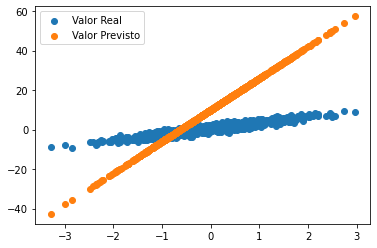

In [5]:
# Plot do valor "real"
plt.scatter(X, y, label = "Valor Real")

# Plot do valor "previsto" pelo nosso modelo
plt.scatter(X, modelo(X), label = "Valor Previsto")

plt.legend()
plt.show()

Calculamos o erro usando uma função de custo *Mean Square Error*

$\frac{1}{N} * \sum_{i=0}^{i \rightarrow N} (y_i - \hat{y_i})^2$

In [6]:
def loss(y, y_pred):
    return tf.reduce_mean(tf.square(y - y_pred))

Utilizamos o gradiente descendente para obter a derivada da função e assim atualizar os pesos com o erro, ajustado ao passo da learning rate

In [7]:
def train(modelo, X, y, lr = 0.01):
    with tf.GradientTape() as t:
        current_loss = loss(y, modelo(X))

    derivada_W, derivada_b = t.gradient(current_loss, [modelo.W, modelo.b])
    modelo.W.assign_sub(lr * derivada_W)
    modelo.b.assign_sub(lr * derivada_b)

In [10]:
# Criamos o modelo
modelo = RegModel()

# Definimos listas vazias para W e b
Ws, bs = [], []

# Número de épocas (quantas vezes o modelo vai passar pelos dados)
epochs = 20

In [11]:
for epoch in range(epochs):
    Ws.append(modelo.W.numpy()) 
    bs.append(modelo.b.numpy())

    current_loss = loss(y, modelo(X))

    train(modelo, X, y, lr = 0.1)
    
    print(f"Epoch {epoch}: Loss (Erro): {current_loss.numpy()}")

Epoch 0: Loss (Erro): 250.64471435546875
Epoch 1: Loss (Erro): 163.73426818847656
Epoch 2: Loss (Erro): 107.11990356445312
Epoch 3: Loss (Erro): 70.2283935546875
Epoch 4: Loss (Erro): 46.180789947509766
Epoch 5: Loss (Erro): 30.500179290771484
Epoch 6: Loss (Erro): 20.27199935913086
Epoch 7: Loss (Erro): 13.598113059997559
Epoch 8: Loss (Erro): 9.241954803466797
Epoch 9: Loss (Erro): 6.397679805755615
Epoch 10: Loss (Erro): 4.539949417114258
Epoch 11: Loss (Erro): 3.3261795043945312
Epoch 12: Loss (Erro): 2.532890796661377
Epoch 13: Loss (Erro): 2.0142505168914795
Epoch 14: Loss (Erro): 1.675061821937561
Epoch 15: Loss (Erro): 1.4531630277633667
Epoch 16: Loss (Erro): 1.3079501390457153
Epoch 17: Loss (Erro): 1.2128915786743164
Epoch 18: Loss (Erro): 1.1506454944610596
Epoch 19: Loss (Erro): 1.1098730564117432


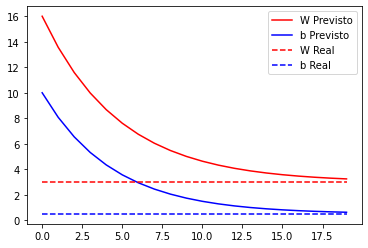

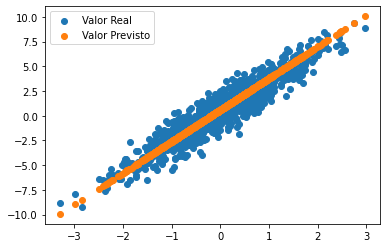

In [14]:
# Plot
plt.plot(range(epochs), Ws, 'r', range(epochs), bs, 'b')
plt.plot([TRUE_W] * epochs, 'r--', [TRUE_b] * epochs, 'b--')
plt.legend(['W Previsto', 'b Previsto', 'W Real', 'b Real'])
plt.show()

# Plot do valor "real"
plt.scatter(X, y, label = "Valor Real")

# Plot do valor "previsto" pelo nosso modelo
plt.scatter(X, modelo(X), label = "Valor Previsto")

plt.legend()
plt.show()